## **CNNs and Deep Learning**

## 2D Convolution
For the further steps, we often need to visualize an image and we define a shortcut for that:

In [0]:
from matplotlib import pyplot as plt
%matplotlib inline

def visualize(img):
    plt.imshow(img,'gray')
    plt.colorbar()
    plt.show()
    print('Image size:', img.shape)

Convolution can be performed in 2D using the function `scipy.signal.convolve2d()`.  

We will Use this function to generate a 2D kernel of size $33\times33$ by five times cascading 2D convolutions of $h$ with itself, starting with h = [1/4,1/4,1/4,1/4].
and then visualize the kernel.

In [0]:
# IMPORTING ALL LIBRARIES

import numpy as np
from scipy.signal import convolve2d

(33, 33)


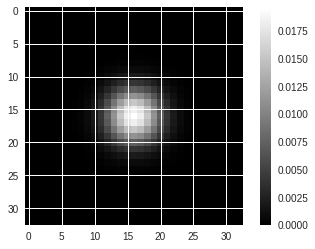

Image size: (33, 33)


In [0]:
# GENERATION OF A 2D KERNEL

h = np.array([[1/4, 1/4],
              [1/4, 1/4]])

for i in range(5):
    h = convolve2d(h, h)
    
kernel = h.astype(np.float32)
    
print(kernel.shape)

# Visualization
visualize(kernel)

Now, load the image 'MR15^044.JPG' (a sample from ImageNet), convert it to gray-scale by summing its  R-, G-, and B-values at each pixel, and normalize it to the interval $[0;1]$. Convolve it with $h$ from the previous task with the options `'valid'` and `'same'`. Visualize all three images. What differences do you observe regarding the size and intensity of the output?

In [0]:
# import image file
from google.colab import files
uploaded = files.upload()

Saving MR15^044.JPG to MR15^044 (1).JPG


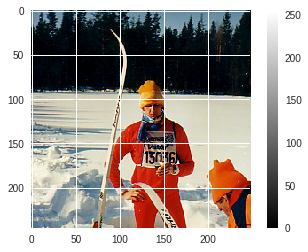

Image size: (246, 248, 3)


In [0]:
# LOADING IN OF AN IMAGE
image = plt.imread("MR15^044.JPG")
visualize(image)

In [0]:
# CONVERTING THE IMAGE INTO GREY-SCALE AND RESCALING

greysum = image.sum(axis=2)

greysum = (greysum - greysum.min()) / (greysum.max() - greysum.min())

greysum = greysum.astype(np.float32)


In [0]:
# CONVOLVING

valid_conv= convolve2d(greysum, kernel, mode="valid")
same_conv = convolve2d(greysum, kernel, mode="same")

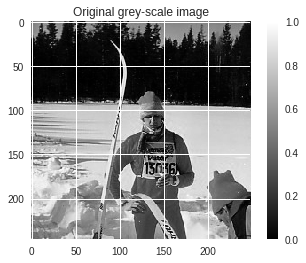

Image size: (246, 248)


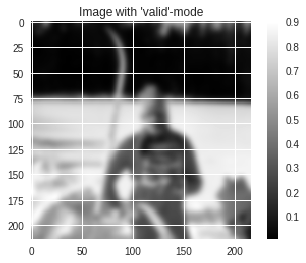

Image size: (214, 216)


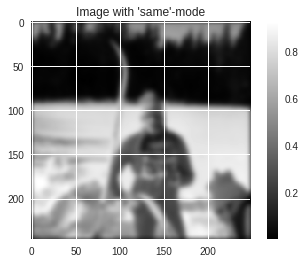

Image size: (246, 248)


In [0]:
# VISUALIZATION
plt.title("Original grey-scale image")
visualize(greysum)

plt.title("Image with 'valid'-mode")
visualize(valid_conv)

plt.title("Image with 'same'-mode")
visualize(same_conv)

The 'same' - mode returns an Image with the same size as the original picture. The solution where the 'valid'- mode was used returns a smaller image. Regarding the intensity of the output: lalalala

Strided convolution removes samples. According to the Nyquist theorem, this can generate aliasing artifacts.  
Visualize the original gray-scale image and the output image from the previous task (with option `'same'`) with only keping every fifth row and column (stride 5). 

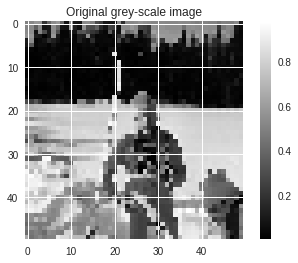

Image size: (50, 50)


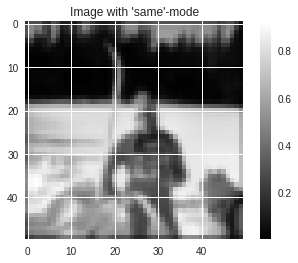

Image size: (50, 50)


In [0]:
# VISUALIZATION WITH STRIDE %
plt.title("Original grey-scale image")
visualize(greysum[::5, ::5])

plt.title("Image with 'same'-mode")
visualize(same_conv[::5, ::5])

With only keping every fifth row and column, it can be observed, that the original grey-scale- image is very coarsely pixeled, whereas the Image with the 'same'-mode has a smooth resolution. But looking especially at the ski, it can be clearly seen, that the pixelation in the original image shows the ski in a much lighter way than the second image. That way it can be detected more easily.

## Convolution  in TensorFlow
We will now repeat the same steps in TensorFlow, where we will exploit its capability to perform *eager execution*. This is initialized as follows:

In [0]:
import tensorflow as tf

print('TensorFlow version '+tf.__version__)
tf.enable_eager_execution()
if tf.executing_eagerly():
    print('Eager execution activated!')

TensorFlow version 1.13.0-rc2
Eager execution activated!


TensorFlow allows to map from and to numpy. Also, operations are automatically casted. In order to get used to TensorFlow and the casting, we repeat the convolution 1.a) from class 5 (see Lisam). As you have learned in the lecture, any convolution with kernel $h$ can also be performed as matrix multiplication by the Toeplitz matrix $H$.
 Using `scipy.linalg.toeplitz` to generate the matrix $H$ for the kernel $h= \begin{array}{|c|c|c|}
      \hline
      \hphantom{-}1 & \hphantom{-}\textbf{2} & -2 \\
      \hline
    \end{array}$ and boundary condition `'same'` and $f= \begin{array}{|c|c|c|c|c|c|c|c|}
      \hline
      \hphantom{-}1 & -1 & -2 & \hphantom{-}\textbf{0} & -1 & \hphantom{-}1 & \hphantom{-}2 & -1 \\
      \hline
    \end{array}$ in TensorFlow (`tf.constant()`). Multiply $H$ and $f$ and display the result. Verify that the result is the same as in 1.a). What are the respective classes of $H$, $f$, and the result?  
    Info: `scipy.linalg.toeplitz` can take the first column and row as input; `[*np.zeros()]=np.zeros()` (`*` dereferences all elements of a tuple) 

In [0]:
# GENERATION OF MATRIX H
from scipy.linalg import toeplitz

h = np.array([1, 2, -2])
column = np.concatenate((h[1:], np.zeros(8)))
row = np.concatenate((h[1::-1], np.zeros(8)))
H = toeplitz(column, row)
H

array([[ 2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -2.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -2.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -2.,  2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -2.,  2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -2.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -2.,  2.]])

In [0]:
# f
f = tf.constant([0, 1, -1, -2, 0, -1, 1, 2, -1, 0], shape=(10, 1))
print(f)

tf.Tensor(
[[ 0]
 [ 1]
 [-1]
 [-2]
 [ 0]
 [-1]
 [ 1]
 [ 2]
 [-1]
 [ 0]], shape=(10, 1), dtype=int32)


In [0]:
# MULTIPLICATION OF H AND f
mult = H @ f
mult

<tf.Tensor: id=416, shape=(10, 1), dtype=int32, numpy=
array([[ 1],
       [ 1],
       [-6],
       [-2],
       [ 3],
       [-1],
       [ 6],
       [ 1],
       [-6],
       [ 2]], dtype=int32)>

Keras layers can be applied in eager mode using the `tf.keras.layers` package. **NOTE:**  `tf.keras.layers` and **NOT** `keras.layers`.

Performing the convolution from the previous task using a convolution layer `Conv1D` and a (trivial) `Sequential` model from `tf.keras`.  
Hints: RTFM of `tf.keras.Sequential` - weights can be set for the model (list) or the layer (by traversing the layers list). Apply `use_bias=False` to avoid random DC-shifts.

In [0]:
# IMPORTING LIBRARY KERAS
import tensorflow.keras as KERAS

In [0]:
# MODEL SET UP
model = KERAS.Sequential([KERAS.layers.Conv1D(filters=1,
                                      kernel_size=3,
                                      strides=1,
                                      use_bias=False,
                                      input_shape=(10, 1),
                                      padding="same")])

model.set_weights([h[::-1].reshape((3, 1, 1))])


si = tf.constant([0, 1, -1, -2, 0, -1, 1, 2, -1, 0],
                 shape=(1, 10, 1),
                 dtype=tf.float32)



In [0]:
#PERFORMING OF THE CONVOLUTION
model(si)

<tf.Tensor: id=452, shape=(1, 10, 1), dtype=float32, numpy=
array([[[ 1.],
        [ 1.],
        [-6.],
        [-2.],
        [ 3.],
        [-1.],
        [ 6.],
        [ 1.],
        [-6.],
        [ 2.]]], dtype=float32)>

Applying the cascaded $33\times33$ filter from task 1 to the image from task 2 using a `Conv2D` layer. Comparing the result visually and by subtracting the fitting result from task 2.

In [0]:
# CONVOLUTION 2D WITH 'valid'-METHOD

model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=1,
                                      use_bias=False,
                                      padding="valid",
                                      input_shape=(246, 248, 1))])

# Setting the weights.
model.set_weights([kernel.reshape((33, 33, 1 ,1))])


greyscale_tensor = tf.constant(greysum,
                        dtype=tf.float32,
                        shape=(1,) + greysum.shape + (1,))

# Doing the convolution.
conv_tensor_valid = model(greyscale_tensor).numpy().squeeze()

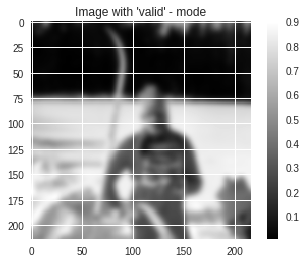

Image size: (214, 216)


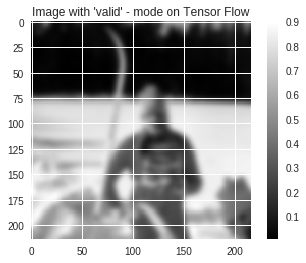

Image size: (214, 216)
Sum of the difference between all pixels of the images: 0.010949168354272842


In [0]:
# VISUALIZATION
plt.title("Image with 'valid' - mode")
visualize(valid_conv)

plt.title("Image with 'valid' - mode on Tensor Flow")
visualize(conv_tensor_valid)

diff = np.sum(np.abs(conv_tensor_valid - valid_conv))
print(f"Sum of the difference between all pixels of the images: {diff}")

In [0]:
# CONVOLUTION 2D WITH 'SAME'-METHOD
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=1,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1))])

model.set_weights([kernel.reshape((33, 33, 1 ,1))])



conv_tensor_same= model(greyscale_tensor).numpy().squeeze()

X = greysum
y = conv_tensor_same

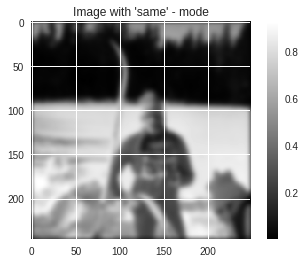

Image size: (246, 248)


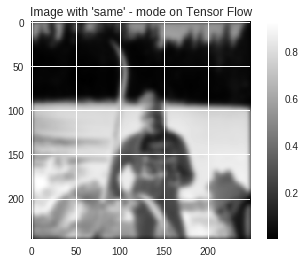

Image size: (246, 248)
Sum of the difference between all pixels of the images: 0.013768615201115608


In [0]:
# VISUALIZATION
plt.title("Image with 'same' - mode")
visualize(same_conv)

plt.title("Image with 'same' - mode on Tensor Flow")
visualize(conv_tensor_same)

diff = np.sum(np.abs(conv_tensor_same - same_conv))
print(f"Sum of the difference between all pixels of the images: {diff}")

Repeating the previous task with stride 5 and compare the result visually and by subtracting the fitting result from earlier task. Will Repeat the task, but with a $1\times1$ filter (coefficient `1`) and stride 5. 

In [0]:
# MODEL VALID
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=5,
                                      use_bias=False,
                                      padding="valid",
                                      input_shape=(246, 248, 1))])

# Setting the weights.
model.set_weights([kernel.reshape((33, 33, 1 ,1))])


greyscale_tensor = tf.constant(greysum,
                        dtype=tf.float32,
                        shape=(1,) + greysum.shape + (1,))

# Doing the convolution.
stride_5_valid = model(greyscale_tensor).numpy().squeeze()

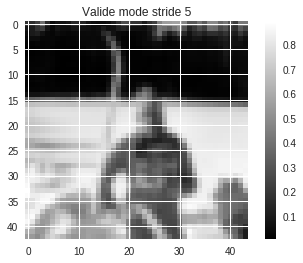

Image size: (43, 44)


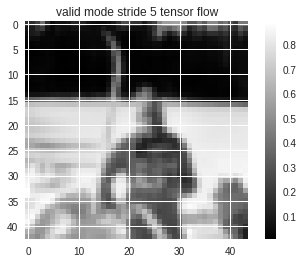

Image size: (43, 44)
0.0


In [0]:
# VISUALIZATION VALID STRIDE 5
plt.title("Valide mode stride 5")
visualize(stride_5_valid)

plt.title("valid mode stride 5 tensor flow")
visualize(conv_tensor_valid[::5, ::5])

diff = np.sum(np.abs(stride_5_valid - conv_tensor_valid[::5, ::5]))
print(diff)

In [0]:
# MODEL SAME
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=5,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1))])

model.set_weights([kernel.reshape((33, 33, 1 ,1))])



stride_5_same= model(greyscale_tensor).numpy().squeeze()


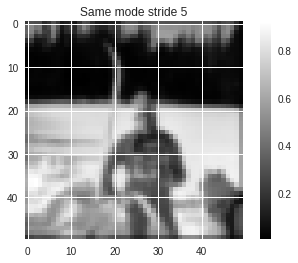

Image size: (50, 50)


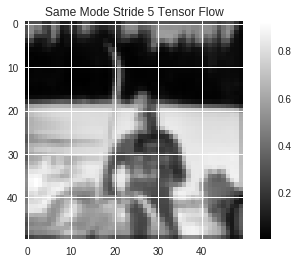

Image size: (50, 50)
30.146135


In [0]:
# VISUALIZATION SAME STRIDE 5
plt.title("Same mode stride 5")
visualize(stride_5_same)

plt.title("Same Mode Stride 5 Tensor Flow")
visualize(conv_tensor_same[::5, ::5])

diff = np.sum(np.abs(stride_5_same - conv_tensor_same[::5, ::5]))
print(diff)

**Redoing that task with a 1x1 filter**

In [0]:
# MODEL VALID
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=(1,1),
                                      strides=5,
                                      use_bias=False,
                                      padding="valid",
                                      input_shape=(246, 248, 1))])

# Setting the weights.
model.set_weights([np.array([1]).reshape((1, 1, 1 ,1))])

greyscale_tensor = tf.constant(greysum,
                        dtype=tf.float32,
                        shape=(1,) + greysum.shape + (1,))

# Doing the convolution.
stride_5_valid = model(greyscale_tensor).numpy().squeeze()

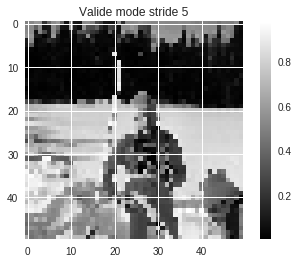

Image size: (50, 50)


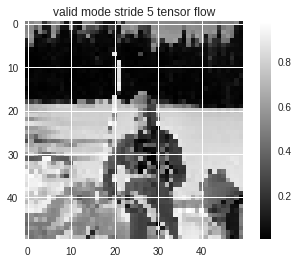

Image size: (50, 50)
0.0


In [0]:
# VISUALIZATION VALID STRIDE 5
plt.title("Valide mode stride 5")
visualize(stride_5_valid)

plt.title("valid mode stride 5 tensor flow")
visualize(greysum[::5, ::5])

diff = np.sum(np.abs(stride_5_valid - greysum[::5, ::5]))
print(diff)

In [0]:
# MODEL SAME
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=(1,1),
                                      strides=5,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1))])

model.set_weights([np.array([1]).reshape((1, 1, 1 ,1))])



stride_5_same= model(greyscale_tensor).numpy().squeeze()


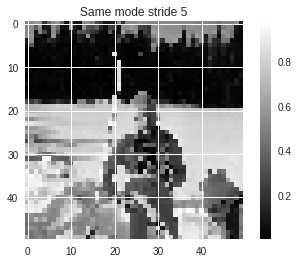

Image size: (50, 50)


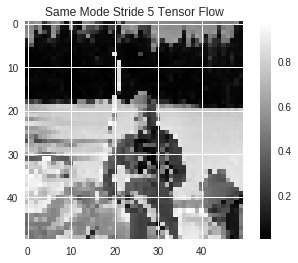

Image size: (50, 50)
0.0


In [0]:
# VISUALIZATION SAME STRIDE 5
plt.title("Same mode stride 5")
visualize(stride_5_same)

plt.title("Same Mode Stride 5 Tensor Flow")
visualize(greysum[::5, ::5])

diff = np.sum(np.abs(stride_5_same - greysum[::5, ::5]))
print(diff)

We now define a new filter that is, unlike $h$, anti-symmetric:

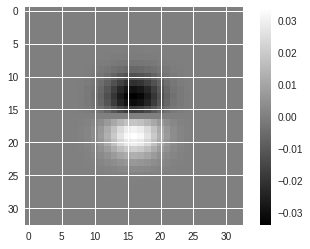

Image size: (33, 33)


In [0]:
fsz = 33
hfsz = 17
g = kernel*(np.expand_dims(np.arange(-hfsz+1,hfsz),1)@np.ones((1,fsz)))
visualize(g)

Repeating everything with $g$ instead of $h$.

**Repetition with g**

In [0]:
# CONVOLUTION 2D WITH 'valid'-METHOD

model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=1,
                                      use_bias=False,
                                      padding="valid",
                                      input_shape=(246, 248, 1))])

# Setting the weights.
model.set_weights([g.reshape((33, 33, 1 ,1))])


greyscale_tensor = tf.constant(greysum,
                        dtype=tf.float32,
                        shape=(1,) + greysum.shape + (1,))

# Doing the convolution.
conv_tensor_valid = model(greyscale_tensor).numpy().squeeze()

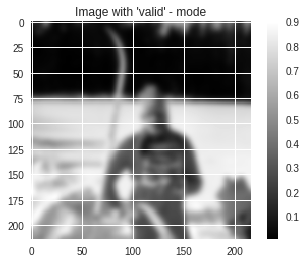

Image size: (214, 216)


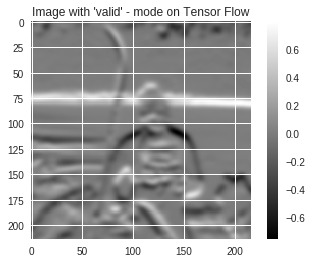

Image size: (214, 216)
Sum of the difference between all pixels of the images: 19676.064453125


In [0]:
# VISUALIZATION
plt.title("Image with 'valid' - mode")
visualize(valid_conv)

plt.title("Image with 'valid' - mode on Tensor Flow")
visualize(conv_tensor_valid)

diff = np.sum(np.abs(conv_tensor_valid - valid_conv))
print(f"Sum of the difference between all pixels of the images: {diff}")

In [0]:
# CONVOLUTION 2D WITH 'SAME'-METHOD
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=1,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1))])

model.set_weights([g.reshape((33, 33, 1 ,1))])



conv_tensor_same= model(greyscale_tensor).numpy().squeeze()

X = greysum
y = conv_tensor_same

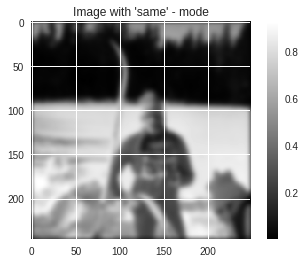

Image size: (246, 248)


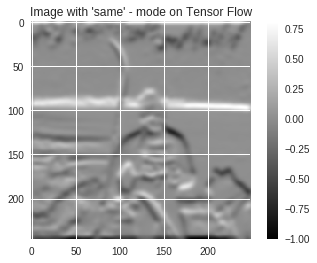

Image size: (246, 248)
Sum of the difference between all pixels of the images: 26426.65625


In [0]:
# VISUALIZATION
plt.title("Image with 'same' - mode")
visualize(same_conv)

plt.title("Image with 'same' - mode on Tensor Flow")
visualize(conv_tensor_same)

diff = np.sum(np.abs(conv_tensor_same - same_conv))
print(f"Sum of the difference between all pixels of the images: {diff}")

**Repetition with g (Cont.)**

In [0]:
# MODEL VALID
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=5,
                                      use_bias=False,
                                      padding="valid",
                                      input_shape=(246, 248, 1))])

# Setting the weights.
model.set_weights([g.reshape((33, 33, 1 ,1))])


greyscale_tensor = tf.constant(greysum,
                        dtype=tf.float32,
                        shape=(1,) + greysum.shape + (1,))

# Doing the convolution.
stride_5_valid = model(greyscale_tensor).numpy().squeeze()

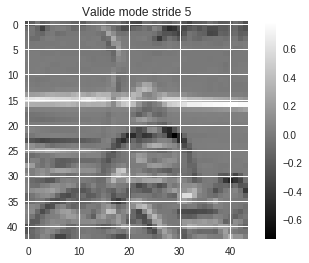

Image size: (43, 44)


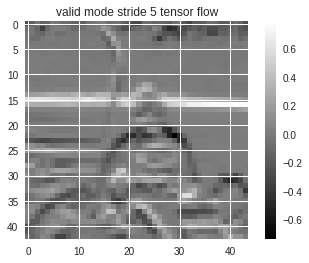

Image size: (43, 44)
0.0


In [0]:
# VISUALIZATION VALID STRIDE 5
plt.title("Valide mode stride 5")
visualize(stride_5_valid)

plt.title("valid mode stride 5 tensor flow")
visualize(conv_tensor_valid[::5, ::5])

diff = np.sum(np.abs(stride_5_valid - conv_tensor_valid[::5, ::5]))
print(diff)

In [0]:
# MODEL SAME
model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=5,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1))])

model.set_weights([g.reshape((33, 33, 1 ,1))])



stride_5_same= model(greyscale_tensor).numpy().squeeze()


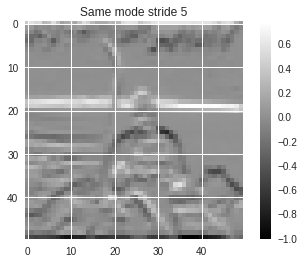

Image size: (50, 50)


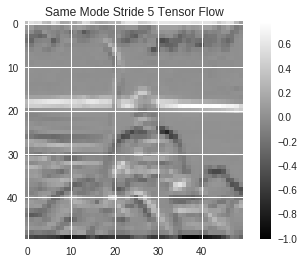

Image size: (50, 50)
28.310947


In [0]:
# VISUALIZATION SAME STRIDE 5
plt.title("Same mode stride 5")
visualize(stride_5_same)

plt.title("Same Mode Stride 5 Tensor Flow")
visualize(conv_tensor_same[::5, ::5])

diff = np.sum(np.abs(stride_5_same - conv_tensor_same[::5, ::5]))
print(diff)

## Training layers
We now take the input and output from above tasks as training data (input and output) for supervised learning of a convolution layer.  
Although we only have a single input and output image, we can expect the training to work, although this usually requires multiple samples.

**Answer:**

The inputs and outputs can be found in the previous tasks.
In the following the output is reshaped to fit the input size:

In [0]:
X = X.reshape((1,) + X.shape + (1,))
y = y.reshape((1,) + y.shape + (1,))
print(y.shape)

(1, 246, 248, 1)


In [0]:
X.shape

(1, 246, 248, 1)

 We want to apply the L1-loss. Define a suitable function `loss(model, x, y)` that can be used during training.

In [0]:
def loss(model, X, y):
  y_hat = model(X)
  return tf.reduce_mean(tf.abs(y_hat - y))

Training a layers requires computing the gradient. For TF in eager mode, we use `GradientTape()` for this purpose.  
Training the model from task 6 (but without assigning the weights) using the data from tasks above, and `GradientDescentOptimizer()`. During training, print the loss every 100 steps and visualize the learned kernel after training.  
Also adding a kernel_constraint to be non-negative.

In [0]:
# MODEL VALID

In [0]:
# MODEL SAME

model = KERAS.Sequential([KERAS.layers.Conv2D(filters=1,
                                      kernel_size=kernel.shape,
                                      strides=1,
                                      use_bias=False,
                                      padding="same",
                                      input_shape=(246, 248, 1),
                                      kernel_constraint=KERAS.constraints.NonNeg())])

# Training the model.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

train_steps = 5000

for i in range(train_steps):
    with tf.GradientTape() as tape:
        loss_value = loss(model, X, y)
        dw = tape.gradient(loss_value, model.variables)  
        optimizer.apply_gradients(zip(dw, model.variables))
        
        if (i + 1) % 100 == 0:
            print(f"Iteration: {i + 1 : 5d} | Loss: {loss_value : .5f}")

Iteration:   100 | Loss:  5.00902
Iteration:   200 | Loss:  4.22109
Iteration:   300 | Loss:  3.48733
Iteration:   400 | Loss:  2.81462
Iteration:   500 | Loss:  2.22644


KeyboardInterrupt: ignored

In [0]:
# Getting the kernel and transforming it for plotting.
learnt_kernel = model.get_weights()[0]
learnt_kernel = learnt_kernel.squeeze()

# Visualizing the original and learnt kernel.
plt.title("Learnt kernel")
visualize(learnt_kernel)

plt.title("Original kernel")
visualize(kernel)

sum_diff_same = np.sum(np.abs(kernel - learnt_kernel))
print(f"Sum of the difference between all pixels of the kernels: {sum_diff_same}")

The result can be improved in several ways: data augmentation (e.g. by flipping the image, using the three RGB-channel separately), regularizing the weights (e.g. using the L1-norm), and replacing the optimizer (e.g., ADAM).  
Lets Try to improve the result using one or several of the mentioned approaches.

## Training a whole network
So far, we have been training a single layer and we have been following the progress with the help of the Eager mode. If we want to train a whole network, it is much better to leave the Eager mode and to compile the graph. For this, we need to kill the notebook kernel ("Kernel" -> "Restart"). After that, we continue below in the classical TensorFlow mode.  

In [0]:
import tensorflow as tf
print('TensorFlow version '+tf.__version__)
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Now, We will train on CIFAR10, which is contained in `keras.datasets`. Download the dataset, show a sample for each class, convert the labels to one-hot coding, and normalize the images.

In [0]:
# IMPORTING LIBRARIES
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras as K

In [0]:
# IMPORTING DATA
train, test = K.datasets.cifar10.load_data()

X_train, y_train = train
X_test, y_test = test

In [0]:
# Creating the figure and axes.
fig, axs = plt.subplots(1, 10, figsize=(15, 10))

for c in range(10):
    # Getting the image.
    img = X_train[(y_train == c)[:, 0], ...][4]
    
    # Plotting it on the corresponding axes.
    axs[c].imshow(img)
    
    # Removing the axis for x and y.
    axs[c].get_xaxis().set_visible(False)
    axs[c].get_yaxis().set_visible(False)
    
    # Setting the title for each label.
    axs[c].set_title(f"Label: {c}")

In [0]:
# Converting the labels to one hot encoding.
yohe_train = np.squeeze(np.eye(10)[y_train])
yohe_test = np.squeeze(np.eye(10)[y_test])

# Normalizing the images.
Xnorm_train = X_train / 255.0
Xnorm_test = X_test / 255.0

Build the depicted LeNet5-inspired model using Keras standard components.
![title](model.png)

In [0]:

# Hyperparameters of the network.
filters = [32, 64, 128]
dropout_rates = [0.2, 0.3, 0.4]

# Defining the input.
inputs = K.layers.Input(shape=Xnorm_train[0, ...].shape)
x = inputs

# Creating the intermediate layers.
for i in range(3):
    x = K.layers.Conv2D(filters[i], (3, 3), padding="same")(x)
    x = K.layers.Activation("elu")(x)
    x = K.layers.BatchNormalization()(x)
    x = K.layers.Conv2D(filters[i], (3, 3), padding="same")(x)
    x = K.layers.Activation("elu")(x)
    x = K.layers.BatchNormalization()(x)
    x = K.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = K.layers.Dropout(dropout_rates[i])(x)

# Flattening the output.
x = K.layers.Flatten()(x)

# Getting the predictions.
predictions = K.layers.Dense(10, activation="softmax")(x)

model = K.models.Model(inputs=inputs, outputs=predictions)

In [0]:
model.summary()

We will now train the network. For displaying the performance we define a helper function:

In [0]:
def plot_model_history(model):
    line_w = 3
    fig_size = (8, 6)
    plt.figure(0)
    plt.plot(model.history['acc'],'r', lw=line_w)
    plt.plot(model.history['val_acc'],'b', lw=line_w)
    plt.rcParams['figure.figsize'] = fig_size
    plt.xlabel("Epoch number")
    plt.ylabel("Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.legend(['Training','Validation'])
    plt.grid(True)

Training the defined model for 50 epochs and a suitable batch size and display the result.

In [0]:
# Compiling the model.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(Xnorm_train, yohe_train,
          batch_size=1000,
          epochs=50,
          validation_data=(Xnorm_test, yohe_test))

In [0]:
plt.style.use("new_bermuda")

# Creating the plot.
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(model.history.history['acc'])
ax.plot(model.history.history['val_acc'])
ax.set_xlabel("Epoch number")
ax.set_ylabel("Accuracy")
ax.set_title("Training Accuracy vs Validation Accuracy")
ax.legend(['Training','Validation'])

The results can be improved in several ways, e.g., by successively reducing the learning rate (divided by two after 30 and 40 epochs), by data augmentation (`ImageDataGenerator`), and by weight regularization (see above).  
Will Try to improve the result using one or several of the mentioned approaches.  
